In [1]:
using ExprOptimization

In [2]:
grammar = @grammar begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = _(Base.rand(1.0:5.0))
end

ExprRules.Grammar(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), :(_(Base.rand(1.0:5.0)))], Symbol[:Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true], Bool[false, false, false, false, true], Dict(:Real=>[1, 2, 3, 4, 5]), Array{Symbol,1}[Symbol[], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[]])

In [3]:
ground_truth(x) = x + 2
function loss(tree::RuleNode, grammar::Grammar)
    ex = get_executable(tree, grammar)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

loss (generic function with 1 method)

In [4]:
srand(0)
p = GeneticProgramParams(20, 5, 6, 0.3, 0.3, 0.3)

ExprOptimization.GeneticProgram.GeneticProgramParams(20, 5, 6, [0.3, 0.3, 0.3], ExprOptimization.GeneticProgram.RandomInit(), ExprOptimization.GeneticProgram.TournamentSelection(2))

In [5]:
using ExprOptimization.GeneticProgram
pop = GeneticProgram.initialize(p.init_method, p.pop_size, grammar, :Real, p.max_depth)

20-element Array{ExprRules.RuleNode,1}:
 1,                                                               
 2{5,5}                                                           
 5,                                                               
 1,                                                               
 4{1,3{3{1,2{3{5,1}1}}1}}                                         
 4{4{3{2{4{1,5}4{5,1}}3{2{1,1}3{5,1}}}2{5,3{5,4{5,1}}}}1}         
 4{1,4{1,1}}                                                      
 2{1,5}                                                           
 2{4{3{5,3{5,3{1,1}}}5}2{5,1}}                                    
 3{4{4{2{1,3{1,1}}2{3{1,5}3{5,1}}}3{2{5,4{5,1}}1}}5}              
 4{1,3{5,3{5,4{2{1,1}2{5,5}}}}}                                   
 4{3{3{1,5}2{3{4{5,5}1}4{1,1}}}3{3{3{5,5}3{2{1,1}2{5,5}}}1}}      
 1,                                                               
 5,                                                               
 1,                   

In [6]:
losses = zeros(p.pop_size)
best_tree, best_loss = GeneticProgram.evaluate!(loss, pop, losses, pop[1], Inf)

LoadError: [91mMethodError: no method matching evaluate!(::#loss, ::Array{ExprRules.RuleNode,1}, ::Array{Float64,1}, ::ExprRules.RuleNode, ::Float64)[0m
Closest candidates are:
  evaluate!(::Function, [91m::ExprRules.Grammar[39m, [91m::Array{ExprRules.RuleNode,1}[39m, [91m::Array{Float64,1}[39m, [91m::ExprRules.RuleNode[39m, [91m::Float64[39m) at /Users/rlee18/.julia/v0.6/ExprOptimization/src/GeneticProgram/genetic_program.jl:166[39m

In [7]:
losses

20-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

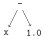

In [13]:
srand(3)
ind1 = GeneticProgram.select(p.select_method, pop, losses)
display(ind1, grammar)

In [9]:
srand(10)
ind2 = GeneticProgram.select(p.select_method, pop, losses)
display(ind2, grammar)

4.0

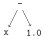

In [10]:
srand(5)
child = GeneticProgram.crossover(ind1, ind2, grammar, p.max_depth)
display(child, grammar)

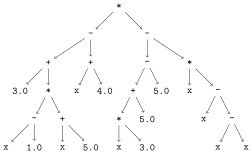

In [11]:
srand(13)
ind3 = GeneticProgram.select(p.select_method, pop, losses)
display(ind3, grammar)

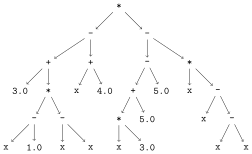

In [12]:
srand(3)
child3 = GeneticProgram.mutation(ind3, grammar, p.max_depth)
display(child3, grammar)